<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


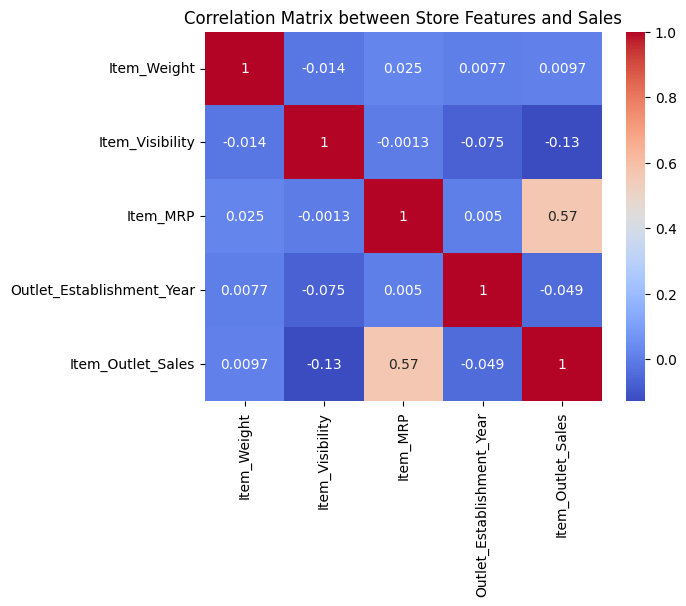

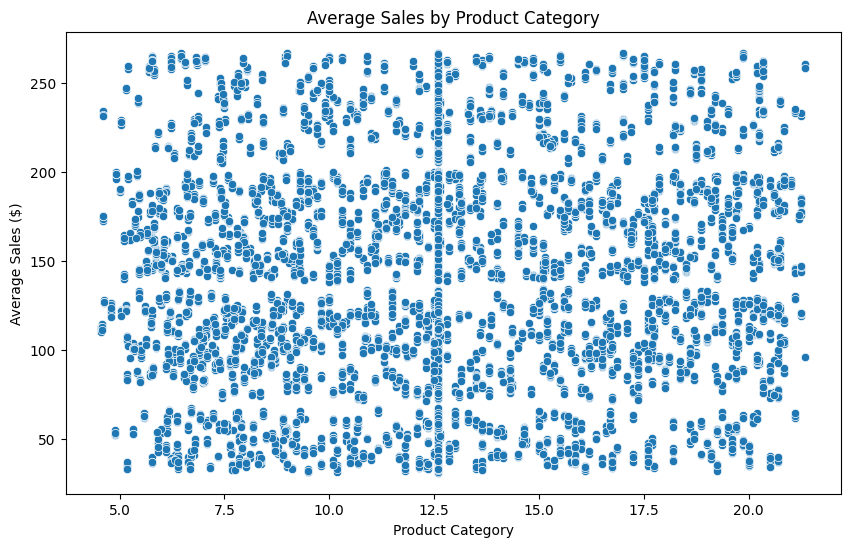

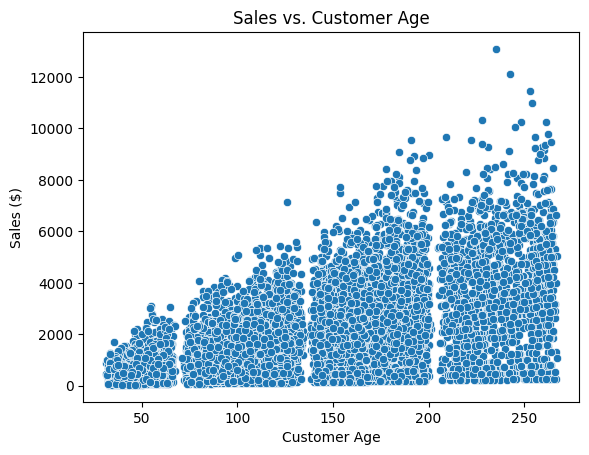

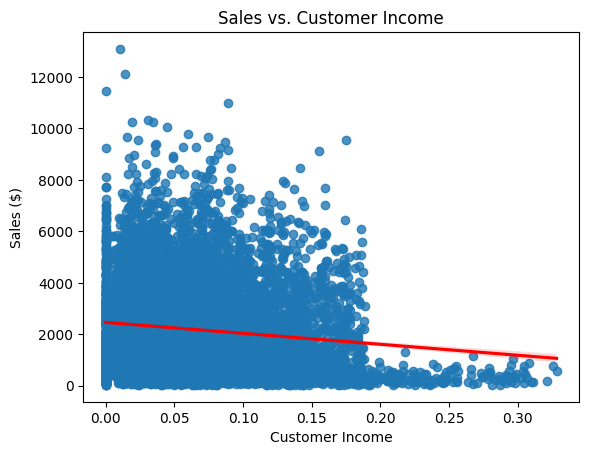

In [8]:
# import libraries
import pandas as pd #for data manipulation
import numpy as np #for numerical operations
import matplotlib.pyplot as plt #for visualization
import seaborn as sns #for statistical graphics

# load dataset
df = pd.read_csv('https://github.com/akki8087/Big-Mart-Sales/raw/refs/heads/master/Train.csv');
#view the first few rows of dataset
df.head()
#get summary of data
df.info()
#for data cleaning (check for missing values)
df.isnull().sum()

#filling values
df.fillna(df['Item_Weight'].median(),inplace=True)

df.fillna(df['Outlet_Size'].mode(),inplace=True)

df[['Item_Weight','Outlet_Size']].isnull().sum()

#Compute the correlation matrix
corr_matrix = df.corr(numeric_only=True)
corr_matrix

#Create a heatmap for visualization
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix between Store Features and Sales')
plt.show()

#data visualization
plt.figure(figsize=(10,6))
sns.scatterplot(x='Item_Weight', y='Item_MRP', data=df)
plt.title('Average Sales by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Average Sales ($)')
plt.show()

sns.scatterplot(x='Item_MRP', y='Item_Outlet_Sales', data=df)
plt.title('Sales vs. Customer Age')
plt.xlabel('Customer Age')
plt.ylabel('Sales ($)')
plt.show()

sns.regplot(x='Item_Visibility', y='Item_Outlet_Sales', data=df, line_kws={'color':'red'})
plt.title('Sales vs. Customer Income')
plt.xlabel('Customer Income')
plt.ylabel('Sales ($)')
plt.show()
